In [1]:
### import manually defined automata
%matplotlib inline
from csrl.pomdp import GridPOMDP
from csrl.oaa import oaa
from csrl import ControlSynthesis
import numpy as np 

oa=oaa()

# LTL Specification
#ltl = 'GF(a & Fb) & G!c' ### goes to 'a' then 'b', gallobly ! c
# Translate the LTL formula to an LDBA
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

print('Initial state:',oa.q0)
print('Transition function: ['),print(*['  '+str(t) for t in oa.delta],sep=',\n'),print(']')
print('Acceptance: ['),print(*['  '+str(t) for t in oa.acc],sep=',\n'),print(']')

Number of Omega-automaton states (including the trap state): 3


Initial state: 0
Transition function: [
  {(): 0, ('a',): 1, ('b',): 0, ('c',): 2, ('a', 'b'): 0, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2},
  {(): 1, ('a',): 1, ('b',): 0, ('c',): 2, ('a', 'b'): 0, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2},
  {(): 2, ('a',): 2, ('b',): 2, ('c',): 2, ('a', 'b'): 2, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2}
]
Acceptance: [
  {(): [None], ('a',): [True], ('b',): [None], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [None], ('b',): [True], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [None], ('b',): [None], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]}
]


(None, None, None)

In [2]:
# POMDP Description
shape = (10,10)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['B',  'B',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['B',  'B',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'B',  'B'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'B',  'B']
])

# Labels of the states
label = np.array([
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       ('c',),       ('c',),       (),       (),       (),       ()],
[(),       (),       (),       (),       ('c',),       ('c',),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()]
],dtype=np.object)
# Colors of the labels
lcmap={
    ('a',):'lightgreen',
    ('b',):'lightgreen',
    ('c',):'pink'
}
grid_pomdp = GridPOMDP(shape=shape,structure=structure,label=label,lcmap=lcmap,figsize=5)  # Use figsize=4 for smaller figures

# Construct the product POMDP
csrl = ControlSynthesis(grid_pomdp,oa)

C:\Users\JUNCHA~1\AppData\Local\Temp/ipykernel_13404/900510374.py:29: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ],dtype=np.object)


In [3]:
csrl.reward

array([[[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0

In [4]:
csrl.A

array([[[[list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([

In [ ]:
 t2, epsilon, average_accumulated_rewards = csrl.train_DRQN(EPISODES=15000, num_steps=600, batch_size=32, weights_update=50, state_sequence_size=7, label_sequence_size=3)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax1 = plt.subplots() 

ax1.set_xlabel('Episode(s)', fontsize=12) 
ax1.set_ylabel('Exploration Rate (Epsilon)', fontsize=12, color = 'red') 
ax1.plot(t2, epsilon, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
# Adding Twin Axes
ax2 = ax1.twinx() 
ax2.set_ylabel('Accumulated Rewards / 10 Episodes', fontsize=12, color = 'blue') 
ax2.plot(t2, average_accumulated_rewards, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
# Show plot
#plt.title('The Accumulated Rewards of 10 by 10 Grid-world Simulation (label uncertainty Pl = 1.0)', fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [8, 5]
plt.show()

In [ ]:
# save the results
np.array(t2).tofile('t2_Q_seq5_label5_task2_p10.csv', sep = ',')
np.array(average_accumulated_rewards).tofile('rewards_Q_seq5_label5_task2_p10.csv', sep = ',')

In [5]:
# read the results
t2 = np.loadtxt('t2_Q_seq7_label3_task2_p10.csv', delimiter=',')
rewards_task1_10_Q_seq5 = np.loadtxt('rewards_Q_seq7_label3_task2_p10.csv', delimiter=',')

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

RGB = 256
# blue
royalblue = (65/RGB,105/RGB,225/RGB)
dodgerblue = (30/RGB,144/RGB,255/RGB)
# green
green = (0/RGB,128/RGB,0/RGB)
# purple
darkorchid = (104/RGB,34/RGB,139/RGB)
# red & pink
coral = (205/RGB,91/RGB,69/RGB)
red = (139/RGB,0/RGB,0/RGB)
pink = (252/RGB,20/RGB,201/RGB)
orange = (255/RGB,128/RGB,0/RGB)

def cumsum_sma(array, period):
    ret = np.cumsum(array, dtype=float)
    ret[period:] = ret[period:] - ret[:-period]
    return ret[period - 1:] / period

In [7]:
t = cumsum_sma(t2,50)
averaged = cumsum_sma(rewards_task1_10_Q_seq5,50)

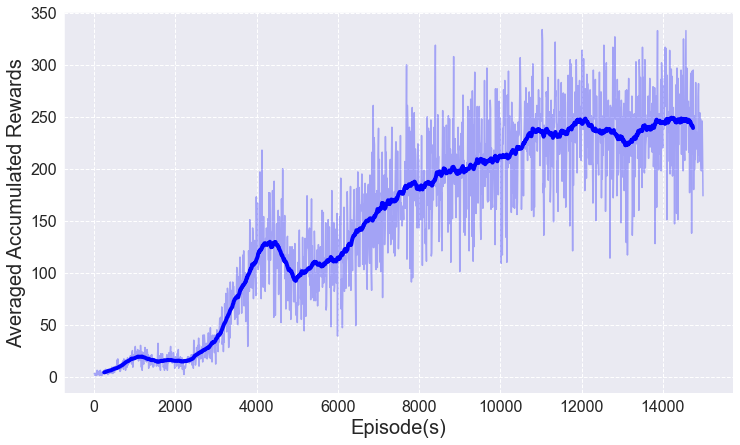

In [9]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlabel('Episode(s)', fontsize=20) 
ax.set_ylabel('Averaged Accumulated Rewards', fontsize=20) 

# We change the fontsize of ticks label 
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)

sns.set_style("darkgrid")

sns.lineplot(x = t2, y = rewards_task1_10_Q_seq5, color='blue', alpha=0.3)
sns.lineplot(x = t, y = averaged, color='blue', linewidth=4)
#plt.legend(['Task 2, Pl=0.9, q state', 'Task 2, Pl=1.0, q state', 'Task 2, Pl=1.0, label state'], fontsize=14, loc='upper left')#, title='600 steps',title_fontsize=16)

plt.grid(color = 'white', linestyle = '--', linewidth = 1)
plt.show()
#sns.move_legend(ax, loc='upper left', frameon=False)

In [5]:
Path = csrl.verify_DRQN(EPISODES=10, num_steps=50, state_sequence_size=7, label_sequence_size=3)

D:\Anaconda\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


START state: (0, 0, 4, 7)
action: 1
reward0.0
state: (0, 0, 5, 7)
action: 2
reward0.0
state: (0, 0, 5, 8)
action: 3
reward0.0
state: (0, 0, 5, 7)
action: 3
reward0.0
state: (0, 0, 5, 6)
action: 2
reward0.0
state: (0, 0, 5, 7)
action: 0
reward0.0
state: (0, 0, 4, 7)
action: 1
reward0.0
state: (0, 0, 5, 7)
action: 1
reward0.0
state: (0, 0, 6, 7)
action: 1
reward0.0
state: (0, 0, 7, 7)
action: 1
reward0.0
state: (0, 0, 8, 7)
action: 3
reward0.0
state: (0, 0, 8, 6)
action: 3
reward0.0
state: (0, 0, 8, 5)
action: 3
reward0.0
state: (0, 0, 7, 5)
action: 3
reward0.0
state: (0, 0, 6, 5)
action: 3
reward0.0
state: (0, 0, 6, 4)
action: 3
reward0.0
state: (0, 0, 6, 3)
action: 3
reward0.0
state: (0, 0, 6, 2)
action: 1
reward0.0
state: (0, 0, 7, 2)
action: 1
reward0.0
state: (0, 0, 8, 2)
action: 3
reward10.0
state: (0, 0, 8, 1)
action: 0
reward0.0
state: (0, 1, 7, 1)
action: 2
reward0.0
state: (0, 1, 7, 2)
action: 0
reward0.0
state: (0, 1, 6, 2)
action: 0
reward0.0
state: (0, 1, 5, 2)
action: 0
rew

D:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


action: 3
reward0.0
state: (0, 0, 1, 7)
action: 3
reward0.0
state: (0, 0, 1, 6)
action: 3
reward0.0
state: (0, 0, 1, 5)
action: 3
reward0.0
state: (0, 0, 1, 4)
action: 3
reward0.0
state: (0, 0, 1, 3)
action: 3
reward0.0
state: (0, 0, 1, 2)
action: 1
reward0.0
state: (0, 0, 2, 2)
action: 3
reward0.0
state: (0, 0, 2, 1)
action: 3
reward0.0
state: (0, 0, 2, 0)
action: 1
reward0.0
state: (0, 0, 3, 0)
episode: 0/10, steps: 50, e: 1.0
START state: (0, 0, 4, 7)
action: 3
reward0.0
state: (0, 0, 4, 6)
action: 2
reward0.0
state: (0, 0, 4, 7)
action: 1
reward0.0
state: (0, 0, 4, 6)
action: 2
reward0.0
state: (0, 0, 4, 7)
action: 3
reward0.0
state: (0, 0, 4, 6)
action: 2
reward0.0
state: (0, 0, 4, 7)
action: 1
reward0.0
state: (0, 0, 5, 7)
action: 1
reward0.0
state: (0, 0, 6, 7)
action: 1
reward0.0
state: (0, 0, 7, 7)
action: 3
reward0.0
state: (0, 0, 7, 6)
action: 3
reward0.0
state: (0, 0, 7, 5)
action: 3
reward0.0
state: (0, 0, 7, 4)
action: 3
reward0.0
state: (0, 0, 7, 3)
action: 3
reward0.0
s

action: 2
reward0.0
state: (0, 2, 0, 9)
action: 2
reward0.0
state: (0, 2, 0, 9)
action: 2
reward0.0
state: (0, 2, 0, 9)
episode: 5/10, steps: 50, e: 1.0
START state: (0, 0, 4, 7)
action: 1
reward0.0
state: (0, 0, 5, 7)
action: 2
reward0.0
state: (0, 0, 5, 8)
action: 1
reward0.0
state: (0, 0, 6, 8)
action: 3
reward0.0
state: (0, 0, 6, 7)
action: 1
reward0.0
state: (0, 0, 7, 7)
action: 3
reward0.0
state: (0, 0, 7, 6)
action: 3
reward0.0
state: (0, 0, 8, 6)
action: 3
reward0.0
state: (0, 0, 9, 6)
action: 3
reward0.0
state: (0, 0, 9, 6)
action: 3
reward0.0
state: (0, 0, 9, 5)
action: 3
reward0.0
state: (0, 0, 9, 4)
action: 3
reward0.0
state: (0, 0, 9, 3)
action: 3
reward0.0
state: (0, 0, 9, 2)
action: 3
reward10.0
state: (0, 0, 9, 1)
action: 0
reward0.0
state: (0, 1, 8, 1)
action: 0
reward0.0
state: (0, 1, 7, 1)
action: 2
reward0.0
state: (0, 1, 7, 2)
action: 0
reward0.0
state: (0, 1, 6, 2)
action: 0
reward0.0
state: (0, 1, 5, 2)
action: 0
reward0.0
state: (0, 1, 4, 2)
action: 0
reward0.0


In [20]:
############################# Plot the Path ##############################
import pylab as pl
from matplotlib.collections import LineCollection

path_idx = 8

size_x = csrl.shape[2]
size_y = csrl.shape[3]

Path_1=[]
Path_2=[]
Path_3=[]
ii=0
for i in range(len(Path[path_idx])):
    if Path[path_idx][i]>=size_x*size_y:
        break
    Path_1.append(int(Path[path_idx][i]))
ii=i
    
for j in range(ii, len(Path[path_idx]), 1):
    if Path[path_idx][j]<size_x*size_y or Path[path_idx][j]>=2*size_x*size_y:
        break
    Path_2.append(int(Path[path_idx][j]-size_x*size_y))
ii=j

for k in range(ii, len(Path[path_idx]), 1):
    if Path[path_idx][k]>=size_x*size_y:
        break
    Path_3.append(int(Path[path_idx][k]))
    
print('Path_1'+str(Path_1))
print('Path_2'+str(Path_2))
print('Path_3'+str(Path_3))

Path_1[57, 67, 66, 56, 57, 67, 77, 87, 86, 85, 84, 83, 82, 72, 82, 81]
Path_2[71, 72, 62, 52, 42, 32, 22, 23, 24, 25, 26, 27, 28, 27, 28, 18]
Path_3[19, 18, 17, 16, 15, 14, 13, 23, 22, 12, 12, 22, 21, 31, 41, 40, 40, 50]


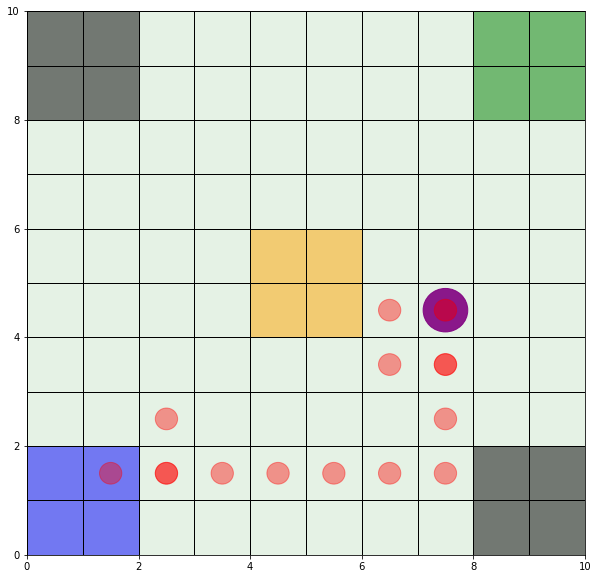

In [21]:
###### q_0 ######
    
x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='green', alpha=.1))

# plot the 'a' state 'q_0'
b_start_x, b_start_y = 0,0
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.5))

# plot the 'b' state 'q_0'
b_start_x, b_start_y = 8,8
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.5))

# plot the trap state 'q_0'
b_start_x, b_start_y = 4,4
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.5))

# plot the BLOCK state 'q_0'
b_start_x, b_start_y = 0,8
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

# plot the BLOCK state 'q_0'
b_start_x, b_start_y = 8,0
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

for i in range(len(Path_1)):
    state_idx = Path_1[i]+1
    ## convert state index in Julia to 'x,y' coordinates in python
    if state_idx%size_x==0:
        coord_x = size_x-1    # x_coordinate
        #coord_y = int(size_y - (state_idx-state_idx%size_x)/size_x) # y_coordinate
        coord_y = int(size_y - (state_idx/size_y)) # y_coordinate
    else:
        coord_x = state_idx%size_x-1    # x_coordinate
        coord_y = int(size_y - 1 - (state_idx-state_idx%size_x)/size_x) # y_coordinate
    ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
    if i==0:
        # start point
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))


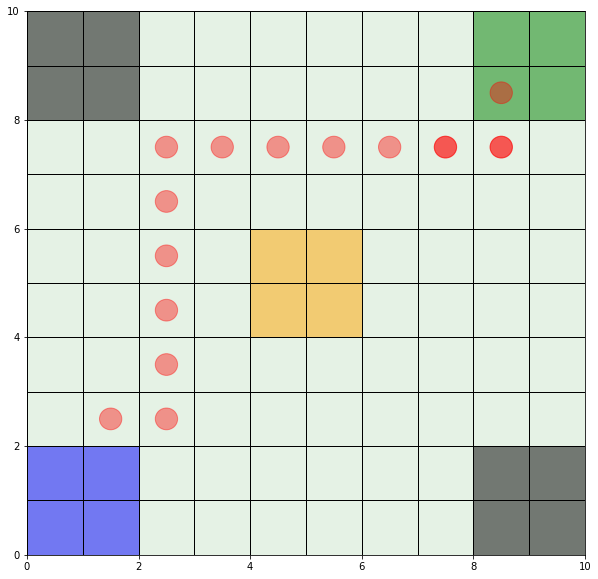

In [22]:
###### q_1 ######

x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='green', alpha=.1))

# plot the 'a' state 'q_0'
b_start_x, b_start_y = 0,0
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.5))

# plot the 'b' state 'q_0'
b_start_x, b_start_y = 8,8
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.5))

# plot the trap state 'q_0'
b_start_x, b_start_y = 4,4
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.5))

# plot the BLOCK state 'q_0'
b_start_x, b_start_y = 0,8
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

# plot the BLOCK state 'q_0'
b_start_x, b_start_y = 8,0
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

for i in range(len(Path_2)):
    state_idx = Path_2[i]+1
    ## convert state index in Julia to 'x,y' coordinates in python
    if state_idx%size_x==0:
        coord_x = size_x-1    # x_coordinate
        #coord_y = int(size_y - (state_idx-state_idx%size_x)/size_x) # y_coordinate
        coord_y = int(size_y - (state_idx/size_y)) # y_coordinate
    else:
        coord_x = state_idx%size_x-1    # x_coordinate
        coord_y = int(size_y - 1 - (state_idx-state_idx%size_x)/size_x) # y_coordinate
    ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
    '''
    if i==0:
        # start point
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))
    '''

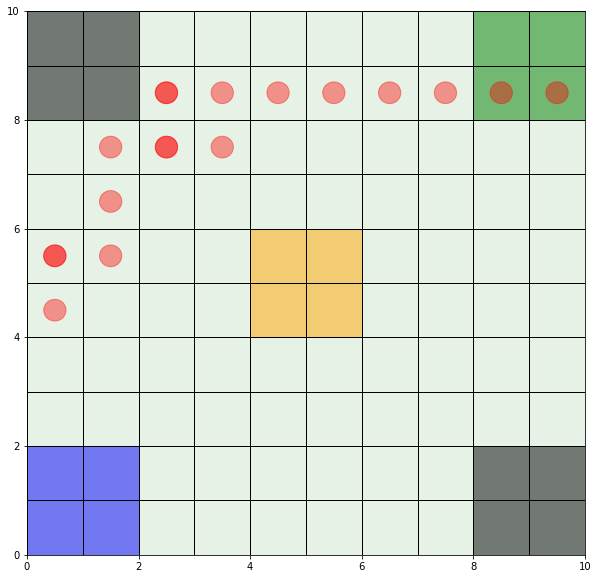

In [23]:
###### q_0 again ######

x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='green', alpha=.1))

# plot the 'a' state 'q_0'
b_start_x, b_start_y = 0,0
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.5))

# plot the 'b' state 'q_0'
b_start_x, b_start_y = 8,8
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.5))

# plot the trap state 'q_0'
b_start_x, b_start_y = 4,4
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.5))

# plot the BLOCK state 'q_0'
b_start_x, b_start_y = 0,8
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

# plot the BLOCK state 'q_0'
b_start_x, b_start_y = 8,0
b_size_x, b_size_y = 2,2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

for i in range(len(Path_3)):
    state_idx = Path_3[i]+1
    ## convert state index in Julia to 'x,y' coordinates in python
    if state_idx%size_x==0:
        coord_x = size_x-1    # x_coordinate
        #coord_y = int(size_y - (state_idx-state_idx%size_x)/size_x) # y_coordinate
        coord_y = int(size_y - (state_idx/size_y)) # y_coordinate
    else:
        coord_x = state_idx%size_x-1    # x_coordinate
        coord_y = int(size_y - 1 - (state_idx-state_idx%size_x)/size_x) # y_coordinate
    ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))